In [29]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab 
import scipy.stats as stats
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns

#Original Dataset
df = pd.read_csv('kc_house_data.csv')

#Dataset Changes
df = df.replace('?' , np.nan)
df['age'] = 2019-df['yr_built']

#Turning Price to Thousands of Dollars
df['price1000'] = df['price']/1000

#Dataset for < $1,000,000 Homes
df_Mill = df.loc[df['price'] < 1000000]

In [30]:
#Regression Model
X = df_Mill[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'sqft_lot', 'grade', 'sqft_living15', 'sqft_lot15', 'age']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df_Mill['price1000']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price1000   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     2735.
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        10:24:29   Log-Likelihood:            -1.2657e+05
No. Observations:               20107   AIC:                         2.532e+05
Df Residuals:                   20097   BIC:                         2.532e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -628.3213     10.449    -60.130      0.000    -648.803    -607.840
sqft_living       0.0608      0.003     24.106      0.000       0.056       0.066
bedrooms        -13.1190      1.306    -10.042      0.000     -15.680     -10.558
bathrooms        33.6416      2.217     15.174      0.000      29.296      37.987
floors           37.7370      2.169     17.401      0.000      33.486      41.988
sqft_lot          0.0001   3.27e-05      4.243      0.000    7.47e-05       0.000
grade            87.7950      1.474     59.576      0.000      84.907      90.684
sqft_living15     0.0535      0.002     22.131      0.000       0.049       0.058
sqft_lot15       -0.0002   4.99e-05     -4.637      0.000      -0.000      -0.000
age               2.8199      0.042     66.975      0.000       2.737       2.902
==============================================================================
Omnibus:                      437.453   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              503.804
Skew:                           0.320   Prob(JB):                    3.98e-110
Kurtosis:                       3.437   Cond. No.                     5.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

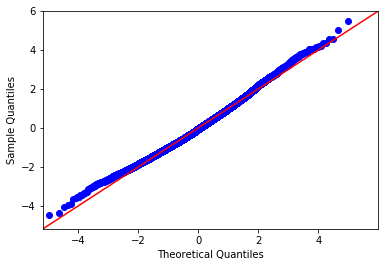

In [3]:
#Residual Plot
residuals = model.resid
fig = sm.qqplot(residuals, stats.t, fit=True, line='45')
plt.show()

In [31]:
#Train and test
X = df_Mill[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'sqft_lot', 'grade', 'sqft_living15', 'sqft_lot15', 'age']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df_Mill['price1000']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16085, 9) (16085,)
(4022, 9) (4022,)


In [32]:
#fit model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

AttributeError: module 'matplotlib.pyplot' has no attribute 'model'

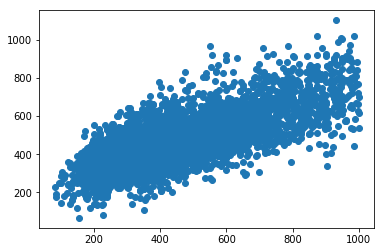

In [18]:
plt.scatter(y_test, predictions)
plt.model

/Users/Mango/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


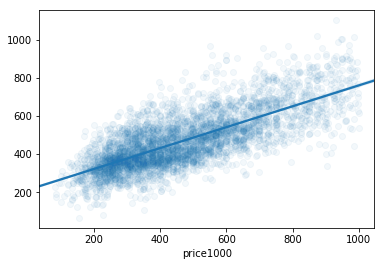

In [27]:
sns.regplot(y_test, y=predictions, scatter_kws={'alpha':0.05});